# **회귀 모델링 프로세스 이해하기**
이번 과제에선 회귀 분석과 더불어 전체적인 모델링 프로세스에 대해 이해해보겠습니다. 



### 데이터셋 설명 ('Concrete_data.csv')
콘크리트는 건설 및 토목공학 분야에서 가장 중요한 재료 중 하나로 널리 사용됩니다. <br/> <br/>
콘크리트의 **압축강도**는 재료의 성능을 평가하는 주요 지표이며, 이는 **양생기간과 혼합에 사용되는 재료 성분**들에 따라 결정됩니다. <br/><br/>
이번 과제의 목표는 이러한 입력 변수들을 바탕으로 **콘크리트의 압축강도를 예측할 수 있는 회귀 모델을 구축**하는 것입니다.

**독립변수**  <br/><br/>
단위: kg/m³
- Cement
- Blast Furnace Slag
- Fly Ash
- Water
- Superplasticizer
- Coarse Aggregate
- Fine Aggregate


단위: 일 (1일 ~ 365일)  
- Age (양생 기간)
<br/><br/>

**종속변수**  <br/><br/>
단위: MPa (Megapascal)
- csMPa


# 1 데이터 탐색

In [1]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 데이터 불러오기
data=pd.read_csv('Concrete_data.csv')

#### 1.a 데이터셋의 크기, 변수의 데이터 타입 등을 확인해줍니다.

In [31]:
data

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<span style="color:red"> ***를 채워주세요 <span>

In [12]:
# 데이터셋의 크기 확인
data.shape



(1030, 9)

In [13]:
# info로 데이터 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


#### 데이터의 모든 변수는 수치형 데이터(Int, Float)로 확인되며, 결측치가 존재하지 않는다. (물론 0,? 등으로 표시된 결측치는 따로 확인해함!!)

#### 1.b 중복 데이터를 확인해 삭제해 줍니다.

In [16]:
# 중복 데이터 확인
dupes=data.duplicated()
print(' The number of duplicates in the dataset are:',sum(dupes),'\n')

pd.DataFrame(data[dupes])


 The number of duplicates in the dataset are: 25 



,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [89]:
# 중복 열 제거하기
data.drop_duplicates(keep="first", inplace=True)

# 중복 여부 확인
dupes1 = data.duplicated()
print("The number of duplicates in the dataset are:", sum(dupes1), "\n")


The number of duplicates in the dataset are: 0 



## 1.c EDA 

#### 데이터셋을 자유롭게 EDA해 보고, 변수들의 분포나 변수 간의 관계를 살펴본 뒤 드는 생각을 간단히 정리해 보세요. (시각화/비시각화 방법으로 각 1개 이상)

#### 필요하다면 통계적 검정을 활용해봐도 좋아요!


#### <span style="color:red"> *** <span>

### 분석후 생각들
    1. 데이터의 총 행이 1030행인데, 이상치가 별로 많지 않아서 이번에는 제거하지 않아도 될 것 같다는 생각을 했다.
    2. 데이터의 전체적인 분포도를 확인하기 위해 히스토그램형태로 확인해봤다. 분포도많으로는 딱히 알아낼수 있는건 없는것 같다. 
    3. 전체 데이터의 히트맵을 그려 상관계수를 확인해보았다. 몇가지 예측되는 사실들로 우선 종속변수에는 시멘트가 가장 높은 상관계수를 가지고 있다는 점이 있다. 특이한 점으로 superplasticizer과 fineaggregate의 경우 water과 강한 음의 상관관계를 가지는걸 볼 수 있었는데, 예측컨대 이 재료들은 물이 섞이면 안되는것 같다. 

In [33]:
from scipy import stats as spst
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
#이상치가 있는지 확인
def find_outlier_by_Tukey_DF(data, feature):
    q1, q3 = np.percentile(data[feature],[25,75])
    iqr = q3-q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    print(f'lower_bound는 {lower_bound.round(3)}, upper_bound는 {upper_bound.round(3)} 입니다')
    
    mask = data[(data[feature] > upper_bound) | (data[feature] < lower_bound)].index
    return mask

mask = find_outlier_by_Tukey_DF(data, 'cement')
print(f'해당 열의 이상치는 {len(mask)}개 입니다')
mask = find_outlier_by_Tukey_DF(data, 'slag')
print(f'해당 열의 이상치는 {len(mask)}개 입니다')
mask = find_outlier_by_Tukey_DF(data, 'flyash')
print(f'해당 열의 이상치는 {len(mask)}개 입니다')
mask = find_outlier_by_Tukey_DF(data, 'water')
print(f'해당 열의 이상치는 {len(mask)}개 입니다')
mask = find_outlier_by_Tukey_DF(data, 'superplasticizer')
print(f'해당 열의 이상치는 {len(mask)}개 입니다')
mask = find_outlier_by_Tukey_DF(data, 'coarseaggregate')
print(f'해당 열의 이상치는 {len(mask)}개 입니다')
mask = find_outlier_by_Tukey_DF(data, 'fineaggregate')
print(f'해당 열의 이상치는 {len(mask)}개 입니다')
mask = find_outlier_by_Tukey_DF(data, 'age')
print(f'해당 열의 이상치는 {len(mask)}개 입니다')


lower_bound는 -44.062, upper_bound는 586.438 입니다
해당 열의 이상치는 0개 입니다
lower_bound는 -214.425, upper_bound는 357.375 입니다
해당 열의 이상치는 2개 입니다
lower_bound는 -177.45, upper_bound는 295.75 입니다
해당 열의 이상치는 0개 입니다
lower_bound는 124.25, upper_bound는 232.65 입니다
해당 열의 이상치는 9개 입니다
lower_bound는 -15.3, upper_bound는 25.5 입니다
해당 열의 이상치는 10개 입니다
lower_bound는 785.9, upper_bound는 1175.5 입니다
해당 열의 이상치는 0개 입니다
lower_bound는 591.375, upper_bound는 963.575 입니다
해당 열의 이상치는 5개 입니다
lower_bound는 -66.5, upper_bound는 129.5 입니다
해당 열의 이상치는 59개 입니다


<Axes: xlabel='age', ylabel='Count'>

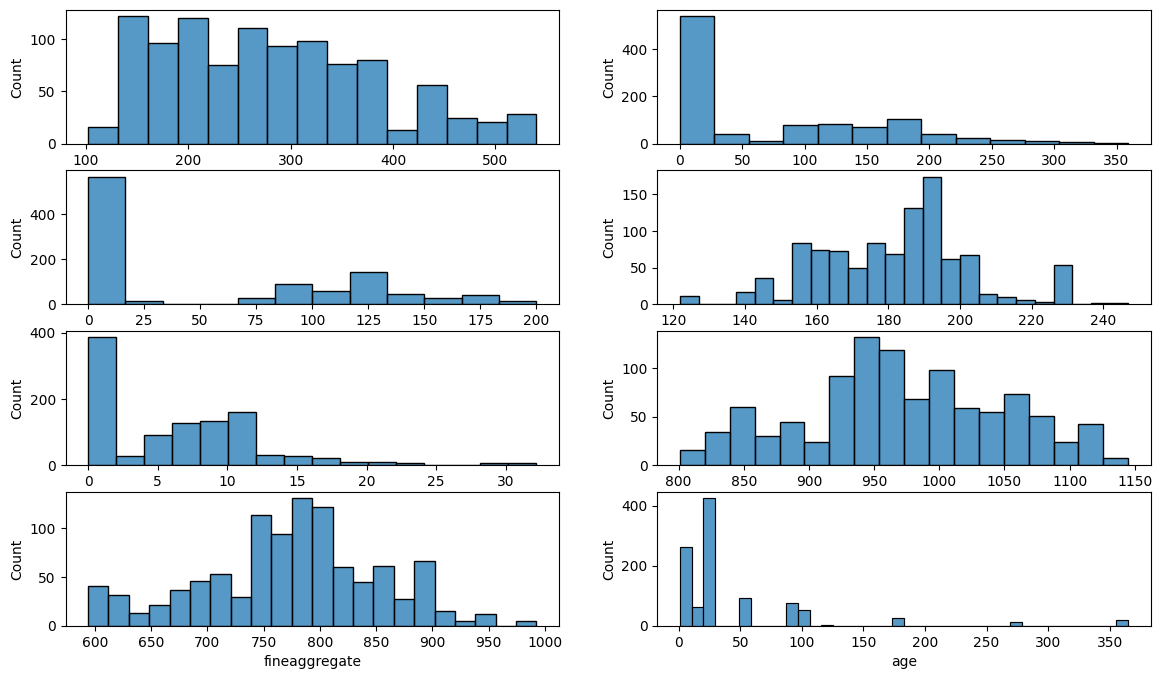

In [ ]:
# 수치형데이터들의 분포를 histplot으로 확인
f, ax = plt.subplots(4, 2, figsize=(14, 8))
sns.histplot(data=data,x='cement',ax=ax[0,0])
sns.histplot(data=data,x='slag',ax=ax[0,1])
sns.histplot(data=data,x='flyash',ax=ax[1,0])
sns.histplot(data=data,x='water',ax=ax[1,1])
sns.histplot(data=data,x='superplasticizer',ax=ax[2,0])
sns.histplot(data=data,x='coarseaggregate',ax=ax[2,1])
sns.histplot(data=data,x='fineaggregate',ax=ax[3,0])
sns.histplot(data=data,x='age',ax=ax[3,1])


<Axes: >

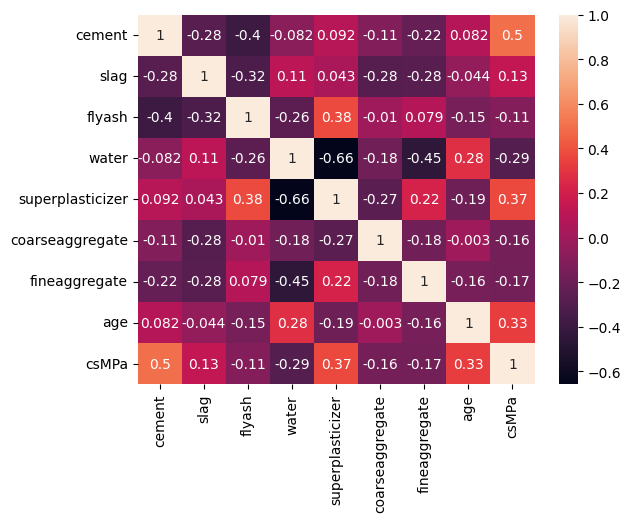

In [ ]:
#상관계수를 확인 
sns.heatmap(data.corr(),annot=True)

# 2 피처 엔지니어링

In [34]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30



## 2.a 변수의 생성 및 삭제

### 2.a.i 파생변수 생성

콘크리트 내구성의 핵심 요소는 **물과 시멘트 비율**입니다.

따라서 파생변수 생성을 통해 새로운 칼럼을 생성해 봅시다.

In [35]:
data['w/c ratio']=data['water']/data['cement']

In [36]:
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa,w/c ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,0.300000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,0.300000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,0.966767


### 2.a.ii 차원 축소(PCA) 및 스케일링

이번 과제에선 차원 축소 기법으로 PCA를 활용해보겠습니다.

우리의 전략은 다음과 같아요.

- 모델 1: 모든 변수를 그대로 사용하여 학습

- 모델 2: PCA를 이용해 차원을 축소한 후 학습


이 두 모델을 비교 분석한 뒤 차원 축소를 적용한 모델이 더 적합한지, 원본 변수를 유지한 모델이 더 적합한지를 판단하여 최종적으로 성능이 좋은 모델을 체택할 예정입니다.

In [37]:
# 데이터를 변형시킬 땐 원본 데이터를 보존하기 위해 복사본 생성하는 것이 좋아요.
data1 = data.copy()


In [39]:
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.decomposition import PCA

# Z-score 표준화로 적용하여 스케일링
data_scaled=data1.apply(zscore)

# 종속변수 'csMPa'를 제외하고 독립변수만 추출
X_scaled=data_scaled.drop('csMPa', axis=1 ) # 열 drop은 axis = ?

#### PCA 모델로 우선 8개의 주성분을 추출한 후, 최종적으로는 95% 누적 분산을 설명하는 개수로 확정 예정입니다

In [40]:
pca = PCA(n_components=8)

# 스케일링된 데이터에 PCA 모델 학습
pca.fit(X_scaled)

,n_components,8
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


PCA 진행 후 아래와 같이 고유값과 설명된 분산 비율을 확인할 수 있어요.

In [41]:
# Eigen Values
# 각 주성분이 설명하는 분산의 크기를 의미
# 값이 클수록 해당 주성분이 데이터의 정보(분산)를 많이 담고 있음

print(pca.explained_variance_)

[2.35567743 2.16998983 1.41144257 1.01898469 0.95660959 0.79235047
 0.19241888 0.08180207]


In [42]:
# Eigen Vectors
print(pca.components_)

[[-0.2867786   0.29061597 -0.17952701  0.53725237 -0.46663661  0.0089868
  -0.28224679  0.19368303  0.42121666]
 [ 0.58008078 -0.10989991 -0.4316977   0.18498022 -0.21467463  0.05473776
  -0.29317616  0.2326836  -0.49160185]
 [-0.12442397 -0.6108983   0.25233798  0.00892907 -0.3373565   0.65097216
   0.02679499  0.0942231   0.01994063]
 [-0.02544038  0.3930268  -0.15211956 -0.26132053  0.03453295  0.53950115
  -0.42467608 -0.52881753 -0.03467253]
 [-0.06476569  0.01558582 -0.59886347 -0.11762404 -0.32711785  0.07291004
   0.67098914 -0.24318831  0.03742567]
 [-0.15853755  0.29062142 -0.19386872 -0.37940771  0.21080484  0.3202305
   0.07500433  0.74533478  0.02709072]
 [-0.00374286 -0.29952837 -0.39443076  0.42034187  0.67428799  0.2162219
  -0.0052466  -0.06547985  0.26883917]
 [ 0.5321122  -0.1579991  -0.06022593 -0.3836739  -0.1127254  -0.09589329
  -0.1407012   0.02539224  0.70619822]]


각 주성분이 데이터를 얼마나 설명하고 있는지 분산 비율을 확인해보겠습니다.

In [43]:
print(pca.explained_variance_ratio_)

[0.26148782 0.24087589 0.15667469 0.1131106  0.10618676 0.08795347
 0.02135912 0.00908029]


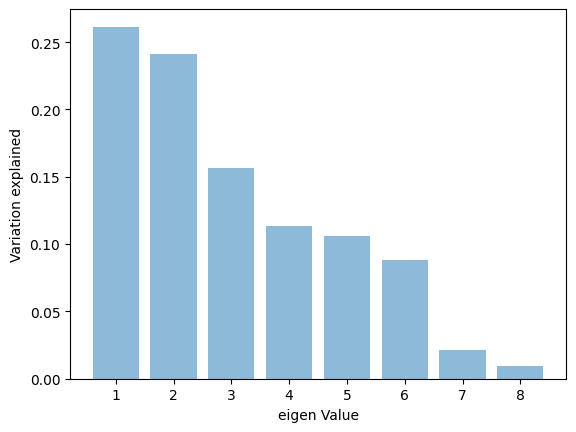

In [44]:
# 주성분 별 설명분산 비율 시각화
plt.bar(list(range(1,9)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

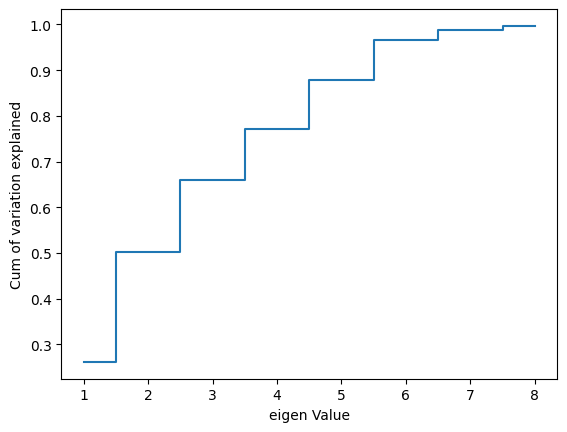

In [45]:
# 누적 설명분산 비율 시각화
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [48]:
# 각 주성분을 추가했을 때 전체 분산을 몇 %까지 설명할 수 있는지를 계산
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
# print("Cumulative Variance Explained", cum_var_exp)
pd.DataFrame(cum_var_exp,columns=['Cumul Variance Explanation'],index=['1','2','3','4','5','6','7','8'])

,Cumul Variance Explanation
1,0.261488
2,0.502364
3,0.659038
4,0.772149
5,0.878336
6,0.966289
7,0.987648
8,0.996729


#### # 6개의 주성분이 95% 이상의 분산을 설명하므로 6개를 선택해 다시 PCA를 진행할게요!

In [49]:
pca6 = PCA(n_components=6)
pca6.fit(X_scaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)


Xpca6 = pca6.transform(X_scaled)
Y = data_scaled['csMPa']

[[-0.2867786   0.29061597 -0.17952701  0.53725237 -0.46663661  0.0089868
  -0.28224679  0.19368303  0.42121666]
 [ 0.58008078 -0.10989991 -0.4316977   0.18498022 -0.21467463  0.05473776
  -0.29317616  0.2326836  -0.49160185]
 [-0.12442397 -0.6108983   0.25233798  0.00892907 -0.3373565   0.65097216
   0.02679499  0.0942231   0.01994063]
 [-0.02544038  0.3930268  -0.15211956 -0.26132053  0.03453295  0.53950115
  -0.42467608 -0.52881753 -0.03467253]
 [-0.06476569  0.01558582 -0.59886347 -0.11762404 -0.32711785  0.07291004
   0.67098914 -0.24318831  0.03742567]
 [-0.15853755  0.29062142 -0.19386872 -0.37940771  0.21080484  0.3202305
   0.07500433  0.74533478  0.02709072]]
[0.26148782 0.24087589 0.15667469 0.1131106  0.10618676 0.08795347]


# 3 모델 생성

#### 모델을 만들기 전에 PCA 변환된 데이터(Xpca6)와 타깃값(Y)을 학습/테스트 데이터셋으로 분리해야겠죠?

test_size=0.20 → 데이터의 20%를 테스트 데이터로 사용합니다.

<span style="color:red"> ***를 채워주세요 <span>

In [50]:
# 기계학습 모델 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(Xpca6,Y,test_size=0.2,random_state=2025) 

PCA를 하지 않은 데이터에 대해서도 스케일링 후 학습/테스트셋으로 나눠줍니다.

In [51]:
data_scaled=data1.apply(zscore)

X = data_scaled.drop('csMPa', axis=1) # 종속변수 열 제외 axis = ?

y = data_scaled['csMPa']

# 특히 정규화 모델(Ridge, Lasso)은 변수 크기에 따라 가중치 패널티가 달라져서 스케일링이 반드시 필요합니다.

In [53]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2025)

### **참고 )** 피쳐 스케일(단위)의 영향 <br/>
10 kg/m³와 10일은 전혀 다른 의미를 가지지만, 모델은 두 값을 단순히 숫자 10으로 인식하여 동일한 수준의 중요도로 처리합니다.


#### ✅ 스케일의 영향을 받는 알고리즘

**경사 하강법 기반 알고리즘**

- 선형 회귀 (Linear Regression)

- 로지스틱 회귀 (Logistic Regression)

**거리 기반 알고리즘**

- K-최근접 이웃 (KNN)

- K-Means 군집화 (K-Means)

- 서포트 벡터 머신 (SVM)

👉 표준화(Standardization) 또는 정규화(Normalization) 등의 스케일링 전처리 과정이 매우 중요


#### ✅ 스케일(단위)의 영향을 받지 않는 알고리즘

- 트리 기반 알고리즘

- 결정 트리 (Decision Tree)

- 랜덤 포레스트 (Random Forest)

- 그래디언트 부스팅 (XGBoost, LightGBM 등)

👉 트리 기반 모델은 변수의 분할 기준이 상대적이기 때문에, 절대적인 숫자의 크기나 단위는 모델 성능에 영향을 주지 않음

## 3.a 모델 결정

1. **선형회귀**

- 우선 가장 기본적인 기준 모델(Baseline)인 선형회귀(Linear Regression)부터 시작할게요. 

- 모델 성능을 비교하는 출발점이 되어줄 수 있어요.

2. **정규화 회귀 기법**

- Ridge Regression (L2 규제)

- Lasso Regression (L1 규제)

    → 다중공선성 문제 완화, 불필요한 변수 축소가 가능합니다.

### 3.a.1 Regression Model 1: Linear Regression

#### 모델 객체 생성, 학습

<span style="color:red"> ***를 채워주세요 <span>

In [54]:
from sklearn.linear_model import LinearRegression

# 1. 선형 회귀 모델 객체를 생성합니다.
regression_model = LinearRegression()

# 2. 학습 데이터(X_train, y_train)를 사용해 모델을 학습(fit)시킵니다.
regression_model.fit(X_train, y_train)

# 3. 테스트 데이터를 이용해 예측하고 y_pred에 저장합니다.
y_pred = regression_model.predict(X_test)

In [55]:
# 참고
# 회귀 계수(coefficient): 각 독립변수가 종속변수에 미치는 영향력의 크기와 방향을 나타냅니다.

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

# 절편(intercept): 회귀선이 y축과 만나는 지점
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(regression_model.intercept_))

The coefficient for cement is 0.6768011753654906
The coefficient for slag is 0.5481179086585918
The coefficient for flyash is 0.35804574568365377
The coefficient for water is -0.14193992946925
The coefficient for superplasticizer is 0.11527433027895823
The coefficient for coarseaggregate is 0.08089776876012258
The coefficient for fineaggregate is 0.11689699624915553
The coefficient for age is 0.42613864217478586
The coefficient for w/c ratio is -0.09923209716092785
The intercept for our model is -0.003690303766507518


#### 모델 평가 (MSE,MAE,R2값 출력)

In [56]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("r2_score:", r2_score)

MSE: 0.4044608778011005
MAE: 0.5009153019771223
r2_score: <function r2_score at 0x000002881B444D60>


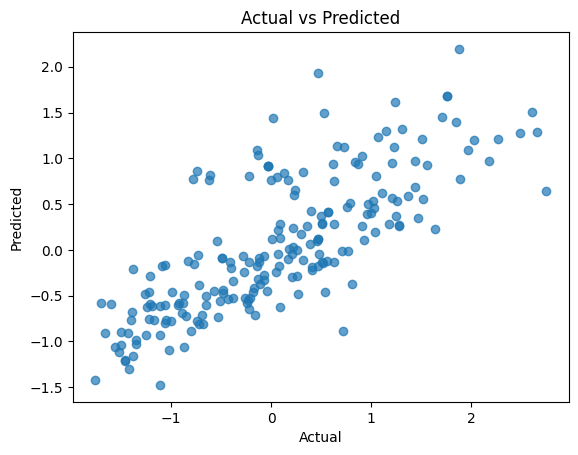

In [57]:
# 시각화로 예측과 실제 데이터 비교하기
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

#### 차원 축소된 데이터에 대해서도 반복해줄게요!

In [58]:
# 모델 학습
regression_model_pca = LinearRegression()
regression_model_pca.fit(X_train_pca, y_train_pca)

# 테스트 데이터에 대한 예측값 계산
y_pred_pca = regression_model_pca.predict(X_test_pca)

# 모델 평가
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
mae_pca = mean_absolute_error(y_test_pca, y_pred_pca)

'''
r2_score의 경우 위에 두 줄로 작성했던 코드를 한 줄로 대체 가능해요!
y_pred = regression_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

'''
r2_pca = regression_model_pca.score(X_test_pca, y_test_pca)

print("MSE:", mse_pca)
print("MAE:", mae_pca)
print("r2_score:", r2_pca)

MSE: 0.4386026304953442
MAE: 0.5284980796855155
r2_score: 0.5634564353702332


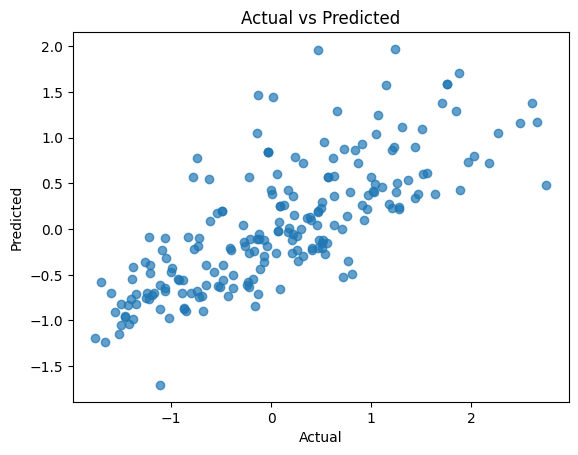

In [59]:
# 시각화로 예측과 실제 데이터 비교하기
plt.scatter(y_test_pca, y_pred_pca, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

### Regression Model 2: Ridge Regression: Regularised Linear Model

In [61]:
# 모든 변수에 대해 모델 생성
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.3) # 객체 생성
ridge.fit(X_train,y_train) # 학습
y_pred_ridge = ridge.predict(X_test) # 예측

# 모델 평가 
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("MSE:", mse_ridge)
print("MAE:", mae_ridge)
print("r2_score:", r2_ridge)

MSE: 0.4043546642262527
MAE: 0.5009712235684324
r2_score: 0.5975436209841096


In [62]:
# PCA 데이터에 대해 모델 생성
ridge_pca = Ridge(alpha=0.3) # 객체 생성
ridge_pca.fit(X_train_pca,y_train_pca) # 학습
y_pred_ridge_pca = ridge_pca.predict(X_test_pca) # 예측

# 모델 평가 
mse_ridge_pca = mean_squared_error(y_test_pca, y_pred_ridge_pca)
mae_ridge_pca = mean_absolute_error(y_test_pca, y_pred_ridge_pca)
r2_ridge_pca = r2_score(y_test_pca, y_pred_ridge_pca)

print("MSE:", mse_ridge_pca)
print("MAE:", mae_ridge_pca)
print("r2_score:", r2_ridge_pca)

MSE: 0.43862897796228645
MAE: 0.5285323846395521
r2_score: 0.5634302115942269


### Regression Model 3: Lasso Regression - Regularised Linear Model

In [63]:
# 모든 변수에 대해 모델 생성
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1) # 객체 생성
lasso.fit(X_train,y_train) # 학습
y_pred_lasso = lasso.predict(X_test) # 예측

# 모델 평가 
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("MSE:", mse_lasso)
print("MAE:", mae_lasso)
print("r2_score:", r2_lasso)

MSE: 0.5064341482693617
MAE: 0.5783564356098527
r2_score: 0.49594335974213044


In [64]:
# PCA 데이터에 대해 모델 생성
lasso_pca = Lasso(alpha=0.1) # 객체 생성
lasso_pca.fit(X_train_pca,y_train_pca) # 학습
y_pred_lasso_pca = lasso_pca.predict(X_test_pca) # 예측

# 모델 평가 
mse_lasso_pca = mean_squared_error(y_test_pca, y_pred_lasso_pca)
mae_lasso_pca = mean_absolute_error(y_test_pca, y_pred_lasso_pca)
r2_lasso_pca = r2_score(y_test_pca, y_pred_lasso_pca)

print("MSE:", mse_lasso_pca)
print("MAE:", mae_lasso_pca)
print("r2_score:", r2_lasso_pca)

MSE: 0.48876142999017397
MAE: 0.5709582449338658
r2_score: 0.5135331115992529


# 4 모델 성능 평가

In [65]:
summary = {'Score': [r2,r2_ridge, r2_lasso],

                    'Score for 6PCA model': [r2_pca,r2_ridge_pca,r2_lasso_pca]

                     }

models=['Linear Regression','Ridge','Lasso']
sum_df = pd.DataFrame(summary,models)

In [66]:
sum_df

,Score,Score for 6PCA model
Linear Regression,0.597438,0.563456
Ridge,0.597544,0.563430
Lasso,0.495943,0.513533


(참고) summary()가 필요하다면 statsmodels의 OLS를 사용할 수 있지만, statsmodels에는 Lasso가 직접 구현되어 있지 않아요.

## 가장 성능이 좋은 모델을 아래 적어주세요!
<span style="color:red">릿지모델이 제일 좋다 <span>

# 5 모델 성능 개선

불필요한 변수를 제거하거나 하이퍼파라미터 튜닝을 통해 모델 성능을 개선하고, 필요 시 모델을 변경하여 처음부터 다시 진행합니다.

In [67]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

# 참고) 해당 모델에 대해 GridSearch를 통해 최적의 하이파라미터를 찾아 model을 개선시켜 봅시다.
alphas = np.logspace(-4, 4, 50)  # alpha 후보들

ridge = Ridge()
ridge_params = {'alpha': alphas}

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

print("📌 Ridge Best alpha:", ridge_grid.best_params_['alpha'])
print("📉 Ridge Best MSE:", -ridge_grid.best_score_)

📌 Ridge Best alpha: 1.2067926406393288
📉 Ridge Best MSE: 0.3881623748774881


## 끝!
... 나기 전에 전체적인 회귀 분석 프로세스(순서)에 대해 간단히 적어보며 마칩시다...

<span style="color:red"> 

1. 데이터를 EDA, 시각화를 통해 살펴본다

2. PCA를 시도한 데이터와 원본데이터를 각각 검증하고 비교해본다

3. 검증과정으로 우선 training셋과 valid 셋을 나눈후, 모델을 만들고 학습시킨다.

4. 모델로 예측을 진행해보고 모델 평가(MSE,MAE,R2값 출력)를 진행한다.

5. 모든 경우를 비교해보고 가장 스코어가 높은 방식을 채택한다.


* 마지막 하이퍼 파라미터튜닝 코드가 살짝 이해가 안되는것 같습니다ㅜ <span>

# 진짜 과제 끝!! 수고하셨습니다~:)